In [1]:
pip install tensorflow kaggle matplotlib


In [17]:
import os
import kagglehub
import tensorflow as tf
from tensorflow.keras.applications import VGG16,ResNet50
from tensorflow.keras import models,layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
path = kagglehub.dataset_download("tongpython/cat-and-dog")
print("Path to dataset files:", path)

100%|██████████| 218M/218M [00:01<00:00, 135MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1


In [4]:
dataset_path="/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1"

contents = os.listdir(dataset_path)
print(contents)

['test_set', 'training_set']


In [5]:
train_dir = "/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/training_set/training_set"
test_dir = "/root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1/test_set/test_set"


In [6]:
img_size=(150,150)
batch_size=32

data preprocessing

In [10]:
train_datagen=ImageDataGenerator(rescale=1./255)

In [11]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
)

Found 8005 images belonging to 2 classes.


In [13]:
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size
)

Found 2023 images belonging to 2 classes.


pre-trained VGG16

In [14]:
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))
base_model_trainable=False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
x=Flatten()(base_model.output)
x=Dense(256,activation="relu")(x)
x=Dropout(0.25)(x)
output=Dense(2,activation="softmax")(x)


In [24]:
model=Model(base_model.input,output)

In [27]:
model.compile(optimizer=Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=['accuracy'])

In [30]:
history=model.fit(train_generator,validation_data=test_generator,epochs=15,batch_size=64)

Epoch 1/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 68s 268ms/step - accuracy: 0.4977 - loss: 0.6933 - val_accuracy: 0.4998 - val_loss: 0.6932
Epoch 2/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 67s 268ms/step - accuracy: 0.4945 - loss: 0.6933 - val_accuracy: 0.5002 - val_loss: 0.6931
Epoch 3/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 82s 266ms/step - accuracy: 0.4880 - loss: 0.6933 - val_accuracy: 0.5002 - val_loss: 0.6931
Epoch 4/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 67s 267ms/step - accuracy: 0.5062 - loss: 0.6932 - val_accuracy: 0.5002 - val_loss: 0.6932
Epoch 5/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 67s 267ms/step - accuracy: 0.5067 - loss: 0.6931 - val_accuracy: 0.4998 - val_loss: 0.6931
Epoch 6/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 67s 268ms/step - accuracy: 0.5007 - loss: 0.6931 - val_accuracy: 0.4998 - val_loss: 0.6932
Epoch 7/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 67s 268ms/step - accuracy: 0.4953 - loss: 0.6932 - val_accuracy: 0.5002 - val_loss: 0.6931
Epoch 8/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 67s 268ms/step - accuracy: 0.4889 - loss: 0

In [31]:
loss,accuracy=model.evaluate(test_generator)
print("validation accuracy:",accuracy)

64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.5036 - loss: 0.6931
validation accuracy: 0.5002471804618835


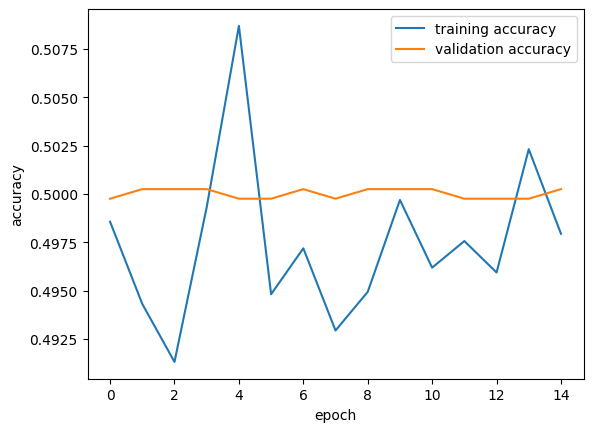

In [32]:
plt.plot(history.history['accuracy'],label="training accuracy")
plt.plot(history.history['val_accuracy'],label="validation accuracy")
plt.legend()
plt.xlabel("epoch")
plt.ylabel(("accuracy"))
plt.show()

Resnet50

In [33]:
resnet=ResNet50(weights='imagenet',include_top=False,input_shape=(150,150,3))
resnet=False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [38]:
model=models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(2,activation='softmax')
])

In [39]:
model.compile(optimizer=Adam(learning_rate=0.01),loss="binary_crossentropy",metrics=['accuracy'])

In [40]:
h1=model.fit(train_generator,validation_data=test_generator,epochs=10,batch_size=64)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 78s 278ms/step - accuracy: 0.4963 - loss: 0.6935 - val_accuracy: 0.4998 - val_loss: 0.6932
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 66s 263ms/step - accuracy: 0.5021 - loss: 0.6933 - val_accuracy: 0.5002 - val_loss: 0.6933
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 67s 266ms/step - accuracy: 0.4917 - loss: 0.6934 - val_accuracy: 0.4998 - val_loss: 0.6935
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 67s 267ms/step - accuracy: 0.5002 - loss: 0.6935 - val_accuracy: 0.5002 - val_loss: 0.6932
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 67s 267ms/step - accuracy: 0.5018 - loss: 0.6934 - val_accuracy: 0.5002 - val_loss: 0.6935
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 67s 268ms/step - accuracy: 0.4941 - loss: 0.6934 - val_accuracy: 0.5002 - val_loss: 0.6933
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 67s 268ms/step - accuracy: 0.4989 - loss: 0.6934 - val_accuracy: 0.5002 - val_loss: 0.6932
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 67s 268ms/step - accuracy: 0.5021 - loss: 0

In [41]:
loss,acc=model.evaluate(test_generator)
print("accuracy:",acc)

64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.5235 - loss: 0.6929
accuracy: 0.49975284934043884


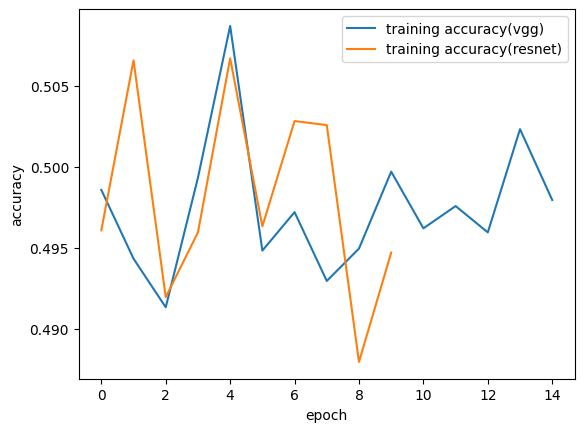

In [42]:
plt.plot(history.history['accuracy'],label="training accuracy(vgg)")
plt.plot(h1.history['accuracy'],label="training accuracy(resnet)")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


In [43]:
model.save("cat vs dog.h5")